In [3]:
# Import necessary packages

import numpy as np
import scipy as sp
import skimage as sk

import copy

from statistics import mode

import matplotlib.pyplot as plt

import matplotlib.path as Path
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage.filters import minimum_filter, median_filter

import os

import importlib

from PIL import Image

from colour import Color

%matplotlib notebook

In [4]:
import pld
importlib.reload(pld)

<module 'pld' from '/Users/berit/Documents/Papers/2022_RP-mapping_Fleck/Data/Figure 2/pld.py'>

In [7]:
here = '/Users/berit/Documents/Papers/2022_RP-mapping_Fleck/Data/Figure 2/' # Directory to file
name = '08_2.55Mx_1x1us_4096px_50umC2_CL130mm_600pAscreen_1.tif' # Image name

filename = here + name

In [8]:
im=Image.open(filename) # Open image
im=np.array(im) # Convert to array
im=im/float(im.max()) # Normalize image intensity
im=im[0:np.min(im.shape), 0:np.min(im.shape)] # Make square


im=im[0:2690,0:2690] # Crop image to region of interest

In [9]:
plt.matshow(im, cmap='gray') # Show image

plt.show()

<IPython.core.display.Javascript object>

## Fourier Peaks

In [10]:
T=pld.ReciprocalIndex(im)

In [11]:
T._initSuperlatticePeaks('q_x','q_y', 'q_arb') 

### Superlattice peaks

Assume x refers to in-plane, and y refers to out-of-plane.

#### x-direction

In [12]:
# In this demo notebook, the peak position is at x = 1344.3730558096981 y = 1438.2932296431838. 
# You can practice finding this peak yourself or just click on a random bright
# spot in next cell and then simply run the cell after T.q_x.refinePeakPositions

<IPython.core.display.Javascript object>


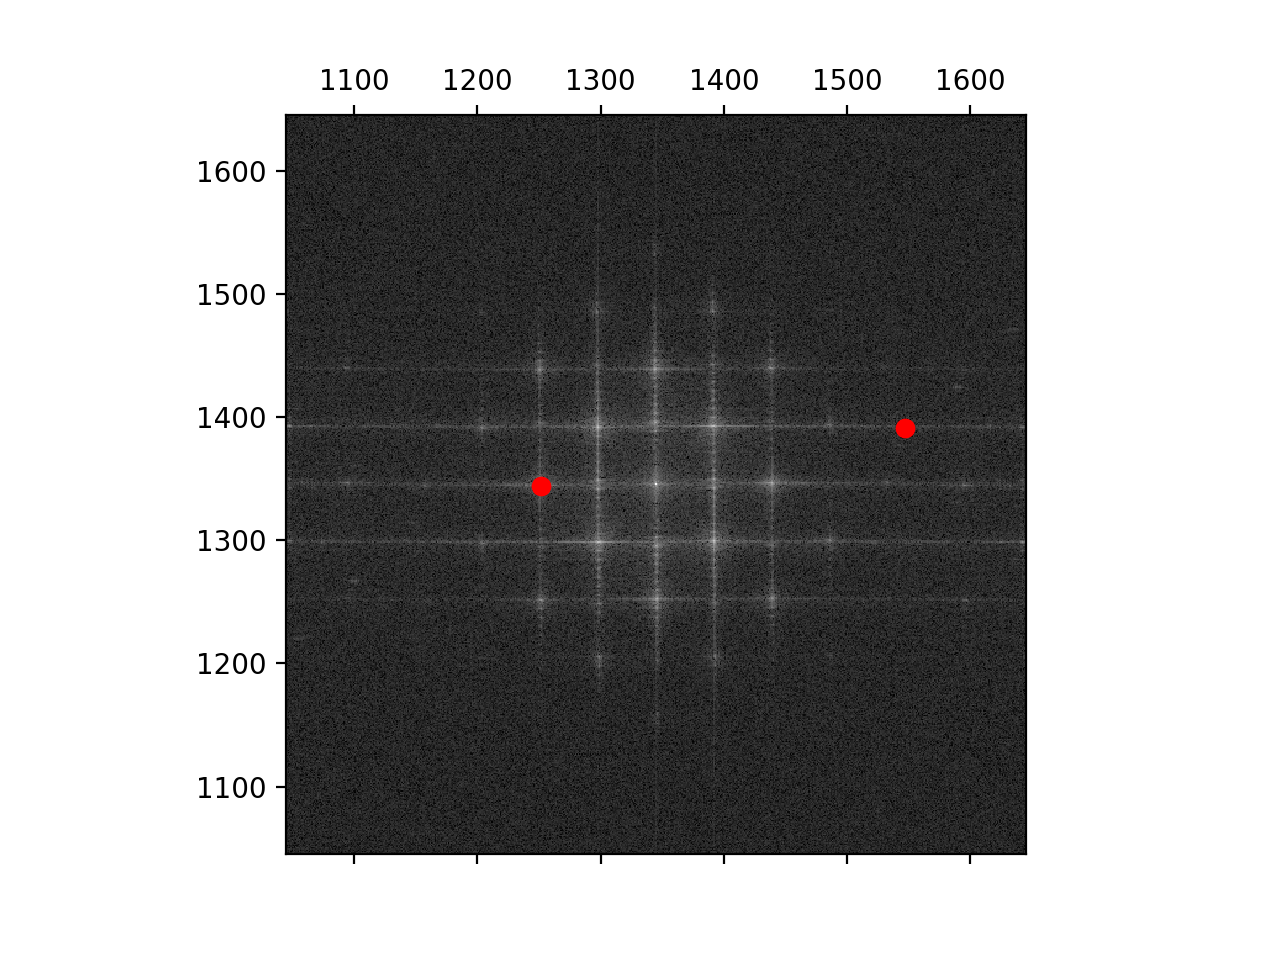

In [115]:
# Click the 020 Bragg spot

T.q_x._clickPeakPosition(zoom=300) # Larger zoom argument -> zoom out; smaller argument -> zoom in


try:
    plt.plot(T.q_x.x,T.q_x.y,'ro') # Plot peaks if any already selectred
except AttributeError:
    pass



In [116]:
T.q_x._appendPeakPosition()  

In [117]:
T.q_x.refinePeakPositions(crop_window=27, track_window=15)

In [118]:
T.q_x.x[-1] = 1344.3730558096981
T.q_x.y[-1] = 1438.2932296431838

In [119]:
alpha = np.arctan(((im.shape[1]/2)-T.q_x.x[-1])/((im.shape[0]/2)-T.q_x.y[-1])) # Defines angle of sample

### Peak positions

<IPython.core.display.Javascript object>


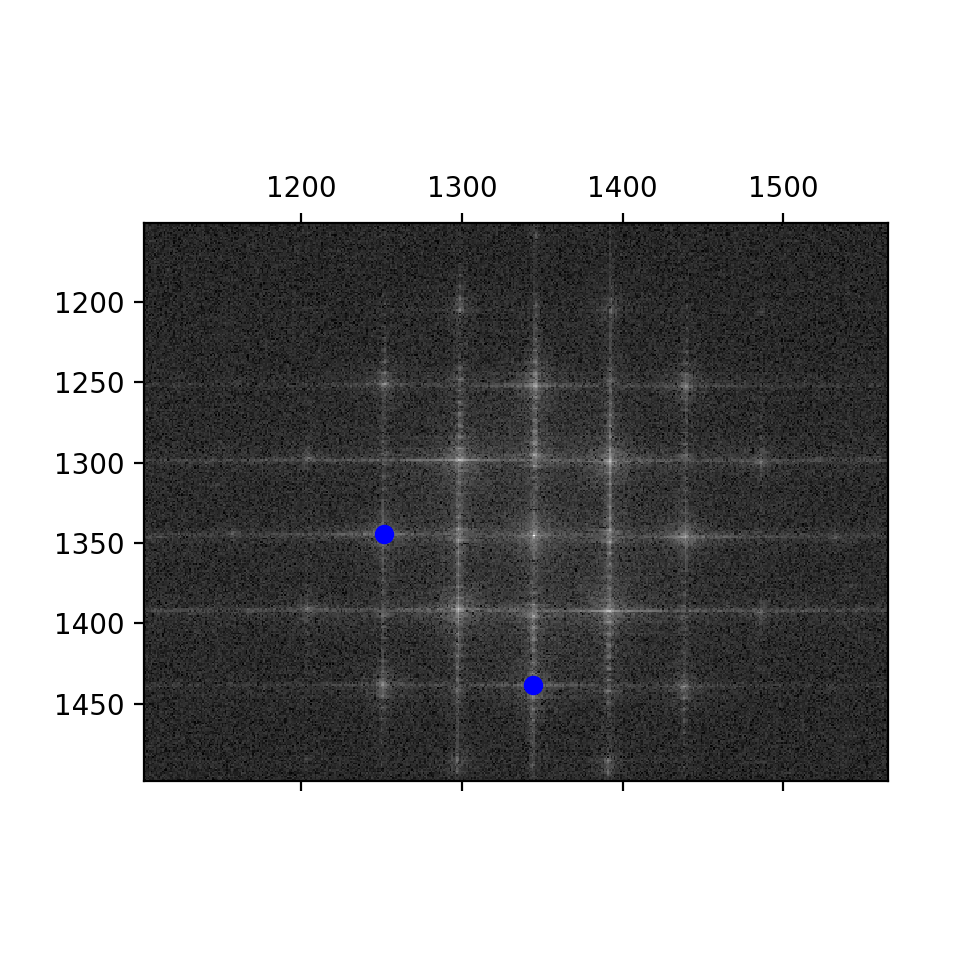

In [122]:
plt.matshow(T.logfft, cmap='gray')
plt.plot(T.q_x.x[-1],T.q_x.y[-1],'bo') # Plot peaks
# plt.plot(T.q_x.x[2],T.q_x.y[2],'bo')

## Phase

### x-direction

In [19]:
# Mask size
sigma=15. # = 19 A

# Mask size defines real-space coarsening through the below formula
# coarsening (angstrom) = lattice spacing (angstrom) * distance from center of fft to 010/100 bragg spot / mask size

# Coarsening around 15 A works for high-resolution images, but as field of view becomes larger you will need lower resolution

#If you select too small of a mask size, it may not cover the entire bragg spot and you will not get any sort of useful data
# If the mask is too large, then you will get an image that is too high resolution and includes a lot of noise 

In [20]:
i,label=-1,'020' #Sets fourier point and assigned it a label that can be used in filenaming 
r_dummy= T.Fourier.fourierFilter(T.q_x.x[i],T.q_x.y[i], sigma=sigma)
r=T.Fourier.phaseLockin(T.q_x.x[i],T.q_x.y[i], sigma_x=sigma, sigma_y=sigma)
phase_q_x=(r[0])%(2*np.pi)

In [21]:
T.Fourier.phase=(T.Fourier.phase-np.pi/2.)%(2.*np.pi) # Generates phase map

In [22]:
kx=T.q_x.x[i]-T.im.shape[0]/2. # Generates wavevectors
ky=T.q_x.y[i]-T.im.shape[1]/2.

In [23]:
T.Fourier.get_eps(ky,kx, phase_shift=np.pi/17.) # Generates strain map

In [24]:
eps_xc,eps_xs = T.Fourier.eps_compression.copy(), T.Fourier.eps_shear.copy()

<IPython.core.display.Javascript object>


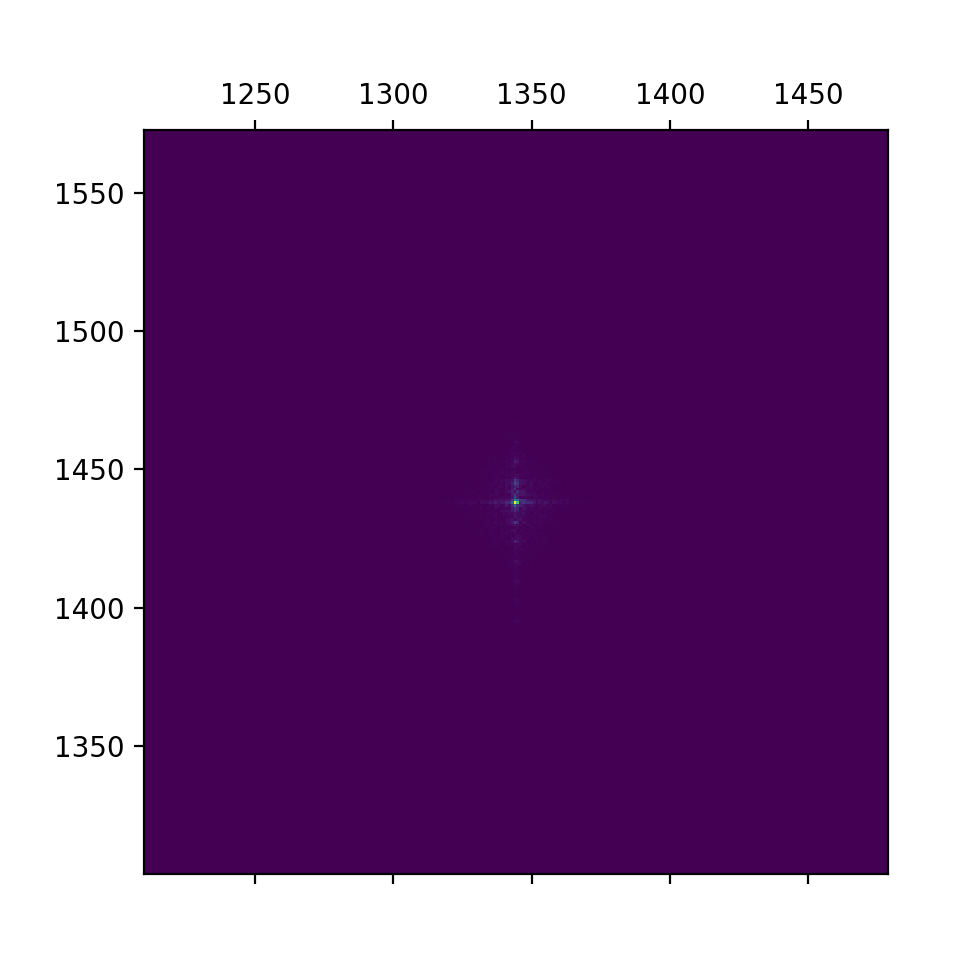

(1303.7932296431838, 1572.7932296431838)

In [25]:
plt.matshow(np.abs(r_dummy[1])) # Shows Fourier component

# To zoom in on masked peak, uncomment following lines.

plt.xlim((T.q_x.x[i]-im.shape[0]/20, T.q_x.x[i]+im.shape[0]/20))
plt.ylim((T.q_x.y[i]-im.shape[1]/20, T.q_x.y[i]+im.shape[1]/20))

### Strain

In [26]:
fig, ax =plt.subplots(1, figsize=(8,4), sharex=True, sharey=True)


c_im00=ax.matshow(T.im, cmap='gray')
c_im0 = ax.matshow(median_filter(eps_xc,size=5), vmin=-0.3, vmax=0.3, cmap='BrBG', alpha = 0.9)

plt.colorbar(c_im0)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


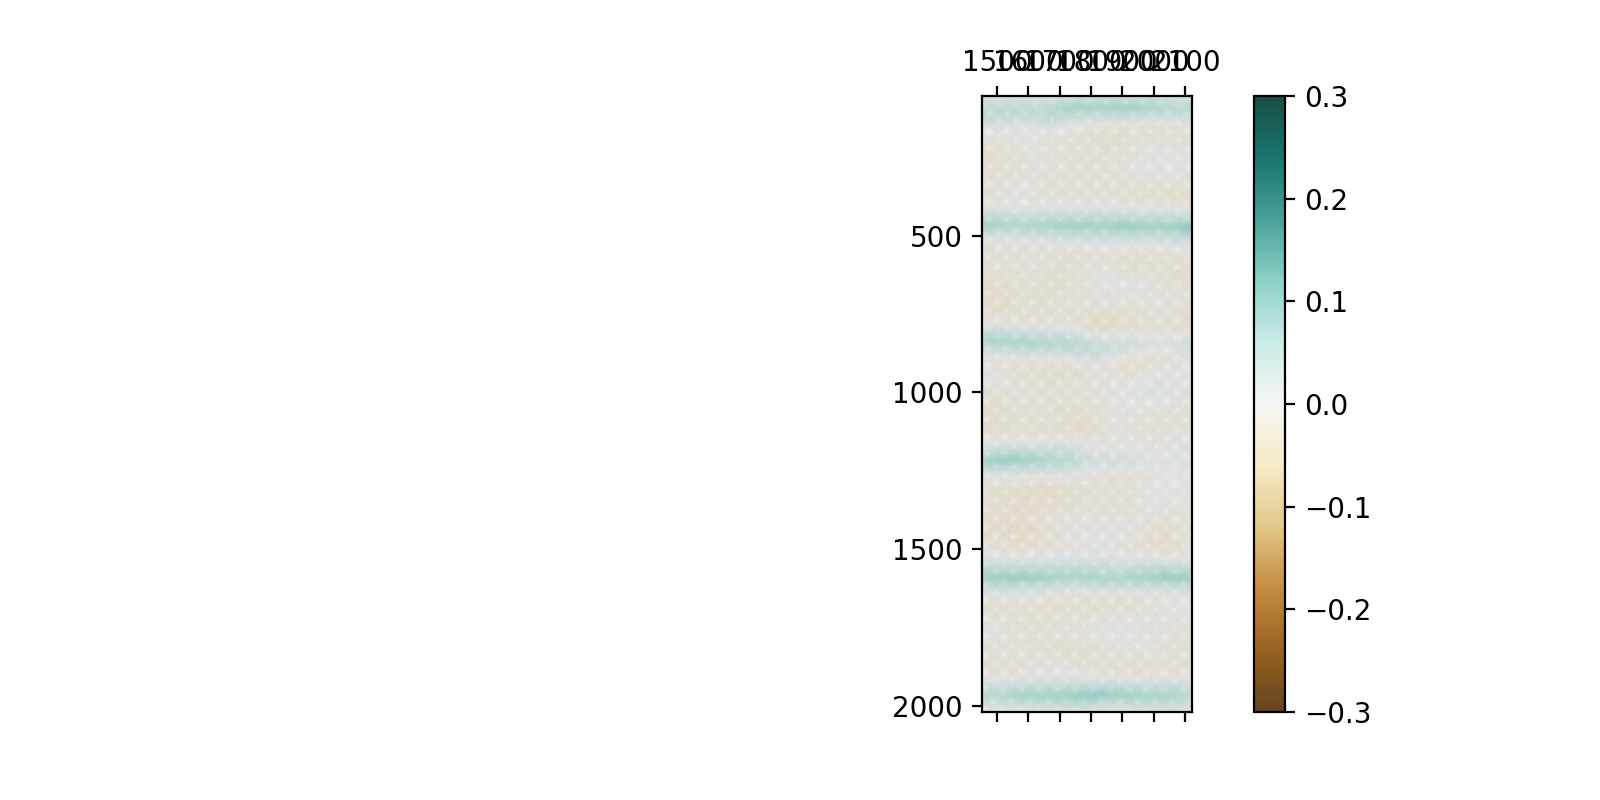

(2020.0, 55.0)

In [27]:
fig, ax =plt.subplots(1, figsize=(8,4), sharex=True, sharey=True)


c_im00=ax.matshow(T.im, cmap='gray')
c_im0 = ax.matshow(median_filter(eps_xc,size=5), vmin=-0.3, vmax=0.3, cmap='BrBG', alpha = 0.9)

plt.colorbar(c_im0)


plt.xlim(1453,2122)
plt.ylim(2020,55)


<IPython.core.display.Javascript object>


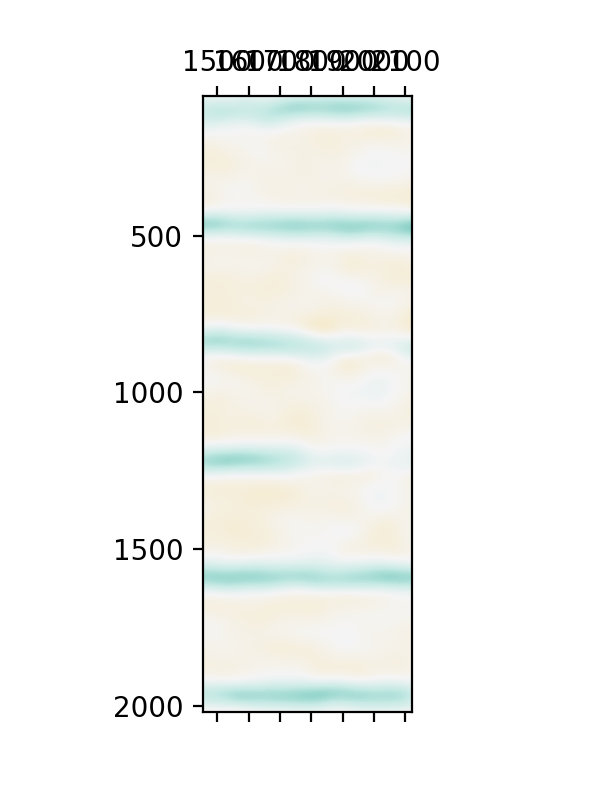

In [156]:
fig, ax =plt.subplots(1, figsize=(3,4), sharex=True, sharey=True)
# c_im00=ax.matshow(T.im, cmap='gray')
c_im0 = ax.matshow(median_filter(eps_xc,size=5), vmin=-0.25, vmax=0.25, cmap='BrBG')
plt.xlim(1453,2122)
plt.ylim(2020,55)
plt.savefig(here+'strain_crop.png', bbox_inches = 'tight', transparent = True, dpi = 400)

In [64]:
# The weakest strain that you want to consider as a boundary. Here we include two different examples
threshold_strict = 0.04
threshold_soft = 0.01
threshold_og = threshold_soft  # I recommend finding a solid boundary, and then finding the strain on the edge of it.
                          # This may take some playing around with. 
    

## Mapping

In [65]:
peak_coords = []

widths = []

px_scale = np.sqrt((T.q_x.x[-1]-im.shape[1]/2)**2+(T.q_x.y[-1]-im.shape[0]/2)**2)/(2*im.shape[0]) # Defines conversion factor for pixels to local n

spacing = 1 # Sampling rate (e.g. spacing = 5 samples every 5 atomic columns)

scale = int(spacing/px_scale) 

x0_list = []
left_edge = -17 # Determines distance from left edge of image to stop 
right_edge = 0 # Determines distance from right edge of image to start

for x0 in range(int((int(len(eps_xc[0])-len(eps_xc[1])*np.tan(alpha))))-right_edge): 
    if x0%scale == 0:
        x0 = x0 + left_edge
        y0 = 10 # Initial y coordinate
        y1 = (eps_xc.shape[0])-15 # Final y coordinate
        x1 = int((y1-y0)*np.tan(alpha)+x0) # Final x coordinate
    
        z = sk.measure.profile_line(image = eps_xc, src = [y0, x0], dst = [y1, x1], linewidth = int(1/(2*px_scale))) # Takes integrated width line profile 

        num = int(np.sqrt((y1-y0)**2+(x1-x0)**2)) # Find number of samples
        
        x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num) 
        

        nums = list(range(num))
        xcoords = []
        ycoords = []
        col = []
        col_widths = []
        col_x0 = []

        for i in nums:
            xcoords.append((float(i))*(np.sin(alpha))+(x0))
            ycoords.append((float(i))*(np.cos(alpha))+(y0))

        z[z< threshold_og] = 0
        
        
        #Width parameter may need to be changed based on the mask size and thresholding.
        #For troubleshooting, somewhere between 1/(2*px_scale) and 1/(10*px_scale) always seems to work
        
        # For sp.signal.find_peaks:
        # z is the interpolated data (the line cut)
        # distance is the minimum distance required before the next peak is counted
        # width is the minimum width required of a peak (if threshold is too low, the width may need to be smaller) 
        
        peaks, _ = sp.signal.find_peaks(z, distance = 1/(px_scale), width = 1/(4*px_scale)) # Find peaks
      
        for j in range(len(peaks)):
            col.append([int(((float(peaks[j]))*(np.sin(alpha))+(x0))), int((float(peaks[j]))*(np.cos(alpha))+(y0))])
            col_widths.append(sp.signal.peak_widths(z, peaks)[0][j])
            col_x0.append([x0])

        if len(col) >=2 :
            peak_coords.append(col)
            widths.append(col_widths)
            x0_list.append([col_x0])

og_peak_coords = copy.deepcopy(peak_coords)
og_widths = copy.deepcopy(widths)



In [66]:
fig, ax =plt.subplots(1, figsize=(8,4), sharex=True, sharey=True)

c_im00=ax.matshow(T.im, cmap='gray')
c_im0 = ax.matshow(median_filter(eps_xc,size=10), vmin=-0.25, vmax=0.25, cmap='BrBG', alpha = 0)


widths_flat = []
for i in widths:
    for j in i:
        widths_flat.append(j)


widths_avg = np.median(widths_flat)

for i in range(len(peak_coords)):
        for j in range(len(peak_coords[i])-1):
           
            px_dist = np.sqrt((peak_coords[i][j][0]-peak_coords[i][j+1][0])**2+(peak_coords[i][j][1]-peak_coords[i][j+1][1])**2) # Distance between peaks in pixels
            almost_uc_dist = px_dist * px_scale # Converts to rough estimate of number of unit cells
            uc_dist = int(np.floor(almost_uc_dist)) # Floors value to obtain integer n phase
        
            #print('n = ' + str(uc_dist)+ ', coords = (' + str(peak_coords[i][j][0]) + ', ' +  str(peak_coords[i][j][1]) + '), ('+ str(peak_coords[i][j+1][0]) + ', ' +  str(peak_coords[i][j+1][1]) + ')')
           
            if uc_dist == 6:
                color = "#FF0102"
            elif uc_dist == 12:
                color = "#9933CC"
            elif uc_dist == 19:
                color = "#2077B4"
                
            
            ax.plot([peak_coords[i][j][0], peak_coords[i][j+1][0]], [peak_coords[i][j][1], peak_coords[i][j+1][1]], 'o-' ,linewidth = 2, markersize = 3, color = color) # Initial plot of counts
            
ax.axis("off")


plt.xlim(1453,2122)
plt.ylim(2020,55)


<IPython.core.display.Javascript object>

(2020.0, 55.0)

In [ ]:
strainmap = median_filter(eps_xc,size=10)

In [141]:
np.shape(T.logfft)

(2690, 2690)

In [157]:
# px_calib = np.sqrt((T.q_x.x[2]-im.shape[1]/2)**2+(T.q_x.y[2]-im.shape[0]/2)**2)/(2*im.shape[0])

calib_pk = (T.q_x.x[-1],T.q_x.y[-1]) ## bragg spot
middle = np.array(np.shape(T.logfft))/2.
bragg_px = np.sqrt( (middle[0]-calib_pk[0])**2 + (middle[1]-calib_pk[1])**2)
px_calib = bragg_px/np.shape(im)[0]*(.3905/2)
px_calib

print(px_calib)

0.006771715387596325


<IPython.core.display.Javascript object>


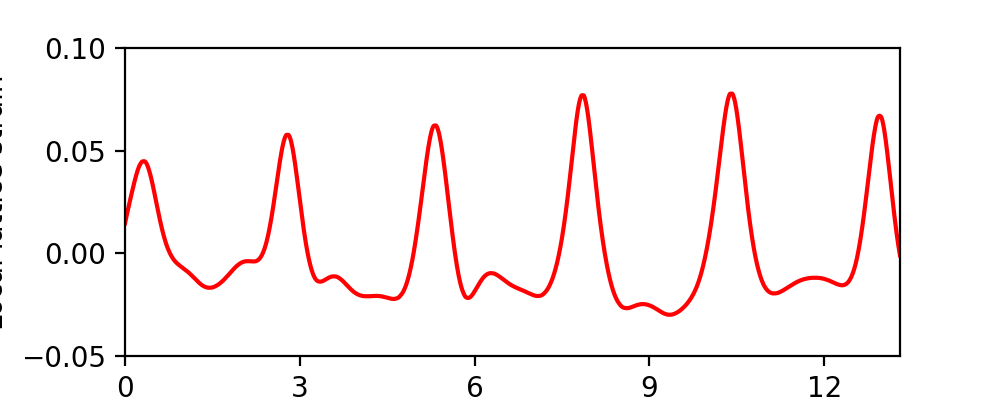

<IPython.core.display.Javascript object>


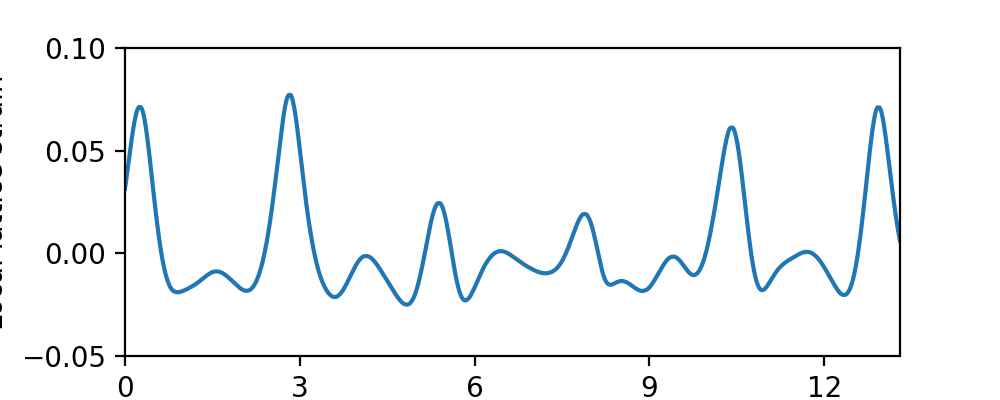

In [158]:
y1, y2 = 55, 2020

x1 = 1563
linecut1 = strainmap[y1:y2,x1]

x2 = 1908
linecut2 = strainmap[y1:y2,x2]

ratio = (2.79+6*3.905)/(6*3.905)
y = np.arange(0,len(linecut1))*px_calib
# y = np.arange(0,len(linecut1))*px_scale/2

fig, ax = plt.subplots(figsize = (5,2))
plt.plot(y,linecut1, color = '#FF0102')
plt.xlabel('Distance (nm)')
plt.ylabel("Local lattice strain")
plt.ylim(-.05,.1)
plt.xlim(0,np.max(y))
plt.xticks([0.0, 3.0, 6.0,9.0, 12.0])
plt.yticks([-0.05,0.0,0.05, 0.1])
plt.savefig(here+'Profile1_calibrated.png', bbox_inches = 'tight', transparent = True, dpi = 400)
plt.show()

fig, ax = plt.subplots(figsize = (5,2))
plt.plot(y, linecut2, color = "#2077B4")
plt.xlabel('Distance (nm)')
plt.ylabel("Local lattice strain")
plt.ylim(-.05,.1)
plt.xlim(0,np.max(y))
plt.yticks([-0.05,0.0,0.05, 0.1])
plt.xticks([0.0, 3.0, 6.0,9.0, 12.0])
plt.savefig(here+'Profile2_calibrated.png', bbox_inches = 'tight', transparent = True, dpi = 400)
plt.show()

In [93]:
px_scale

0.017341140557224903